In [1]:
import numpy as np
import pathlib
import os

In [26]:
def para_load(num):
    folder_path = pathlib.Path("view_mat")
    file_path = os.path.join(folder_path, str(num)+".csv")
    
    Rt = np.loadtxt(file_path, delimiter=",")
    Rt = np.linalg.inv(Rt)
    cam_world_cood = -np.dot(Rt[0:3,0:3].T, Rt[0:3,3])
    return cam_world_cood

In [27]:
para_load(0)

array([ 0.71085502,  2.73482222, -3.93907169])

In [28]:
c_l = []
for i in range(263):
    coord = para_load(i)
    c_l.append(coord)
c_l = np.asarray(c_l)

In [29]:
x_list = c_l[:,0]
y_list = c_l[:,1]
z_list = c_l[:,2]

<IPython.core.display.Javascript object>


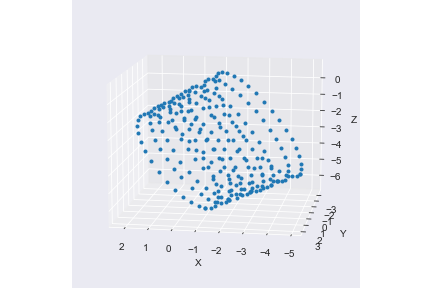

In [31]:
import matplotlib.pyplot as plt
%matplotlib notebook
#seabornでグラフをきれいにしたいだけのコード
import seaborn as sns
sns.set_style("darkgrid")

#3次元プロットするためのモジュール
from mpl_toolkits.mplot3d import Axes3D

#グラフの枠を作っていく
fig = plt.figure()
ax = Axes3D(fig)

#軸にラベルを付けたいときは書く
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")

#.plotで描画
#linestyle='None'にしないと初期値では線が引かれるが、3次元の散布図だと大抵ジャマになる
#markerは無難に丸
ax.plot(x_list,y_list,z_list,marker=".",linestyle='None')

#最後に.show()を書いてグラフ表示
plt.show()

In [ ]:
def rotation_mat(angle):
    Rx = np.array([[1,0,0],
                 [0, np.cos(angle[0]), -np.sin(angle[0])],
                 [0, np.sin(angle[0]), np.cos(angle[0])]])

    Ry = np.array([[np.cos(angle[1]), 0, np.sin(angle[1])],
                 [0,1,0],
                 [-np.sin(angle[1]), 0, np.cos(angle[1])]])

    Rz = np.array([[np.cos(angle[2]), -np.sin(angle[2]), 0],
                 [np.sin(angle[2]), np.cos(angle[2]), 0],
                 [0,0,1]])
    return Rz@Rx@Ry

angle = [-np.pi/2, np.pi/2, np.pi/2]
R = rotation_mat(angle)
R_mirror = np.array([[-1,0,0],
                    [0,1,0],
                    [0,0,1]])